<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None
Number of Samples: 12001
Number of Features: 9


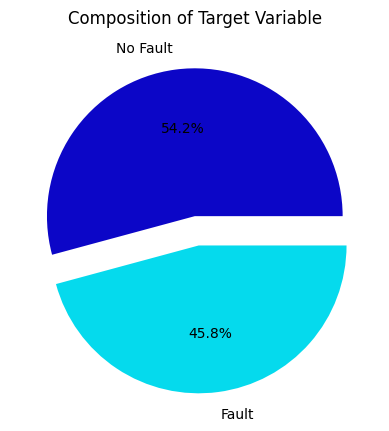

               Ia         Ib          Ic        Va        Vb        Vc
0     -170.472196   9.219613  161.252583  0.054490 -0.659921  0.605431
1     -122.235754   6.168667  116.067087  0.102000 -0.628612  0.526202
2      -90.161474   3.813632   86.347841  0.141026 -0.605277  0.464251
3      -79.904916   2.398803   77.506112  0.156272 -0.602235  0.445963
4      -63.885255   0.590667   63.294587  0.180451 -0.591501  0.411050
...           ...        ...         ...       ...       ...       ...
11996  -66.237921  38.457041   24.912239  0.094421 -0.552019  0.457598
11997  -65.849493  37.465454   25.515675  0.103778 -0.555186  0.451407
11998  -65.446698  36.472055   26.106554  0.113107 -0.558211  0.445104
11999  -65.029633  35.477088   26.684731  0.122404 -0.561094  0.438690
12000  -64.598401  34.480799   27.250065  0.131669 -0.563835  0.432166

[12001 rows x 6 columns]
0        0
1        0
2        0
3        0
4        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
N

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
import sys
import matplotlib.pyplot as plt

# Load your dataset (assuming it's already cleaned and saved in a CSV)
binary_data = pd.read_csv('/content/detect_dataset.csv')

# Dataset Info
print(binary_data.info())

print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

# Plot target variable distribution
plt.pie(x=binary_data['Output (S)'].value_counts(), labels=['No Fault', 'Fault'],
        explode=[0, 0.2], autopct='%1.1f%%', labeldistance=1.15,
        colors=['#0c06c7', '#05daed'])
plt.title("Composition of Target Variable")
plt.show()


# Split dataset into features (X) and target (y)
X = binary_data.iloc[:, 1:7]  # Input features (Ia, Ib, Ic, Va, Vb, Vc)
y = binary_data.iloc[:, 0]  # Output label (Fault or No Fault)
print(X)
print(y)




In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Layer1 with 24 and Layer2 with 16 nodes is better than 16 and 24 respectively.
DENSE1_SIZE = 22
DENSE2_SIZE = 16
DENSE3_SIZE = 8
NUM_OF_EPOCHS = 20
BATCH_SIZE = 12

model = tf.keras.Sequential()
input_shape = X.shape[1]
print(input_shape)
model.add(tf.keras.layers.Flatten(input_shape =(input_shape,)))
model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu'))
model.add(tf.keras.layers.Dense(DENSE2_SIZE, activation='relu'))
model.add(tf.keras.layers.Dense(DENSE3_SIZE, activation='relu'))
# Output labels: 0 / 1


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NUM_OF_EPOCHS,
                    verbose=1, validation_split=0.22)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:",score[1])

# Save the Keras model in .h5 format
model.save('fault_detection_model.h5')


# Convert the model to TensorFlow Lite format (with optimization for size)
def representative_dataset():
    for _ in range(100):
        yield [X_test.astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
with open('fault_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)


6
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6671 - loss: 1.7033 - val_acc: 0.9190 - val_loss: 0.2132
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9660 - loss: 0.1461 - val_acc: 0.9834 - val_loss: 0.0854
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9854 - loss: 0.0803 - val_acc: 0.9863 - val_loss: 0.0631
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9879 - loss: 0.0551 - val_acc: 0.9877 - val_loss: 0.0595
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9698 - loss: 0.0975 - val_acc: 0.9872 - val_loss: 0.0513
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9906 - loss: 0.0416 - val_acc: 0.9886 - val_loss: 0.0488
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9895 - loss: 0.0460 - val_acc: 0.9877 - val_loss: 0.0504
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9881 - loss: 0.0444 - val_acc: 0.9877 - val_loss: 0.0893
Epoch 9/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9667 -

Test Score: 0.03953345865011215
Test Accuracy: 0.99208664894104
Saved artifact at '/tmp/tmpfxblper5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_80')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137030700871424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137030700873536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137031359021648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137030699950576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137030881301376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137031323224368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137033190648016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137033621486256: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# for i in X.iloc[num]:
#      print(i,end='f,')
# print("\n", y[num])

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/fault_detection_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

# Test the model on random input data.
input_shape = input_details[0]['shape']

input0_data = np.random.random_sample(input_shape)
print("Input 0:", input0_data)
input0_data = np.array(input0_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input0_data)

interpreter.invoke()
# The function get_tensor() returns a copy of the tensor data.
# Use tensor() in order to get a pointer to the tensor.
output0_data = interpreter.get_tensor(output_details[0]['index'])
print(output0_data)

# Verify if the same data is given to the original model what is the output
output0_data = model.predict(input0_data)
print("Predicted Output:", output0_data)


input1_data = [[63.1268571,	-36.79144884,	-26.33540826,	0.184998712,	0.407249466,	-0.592248178]]
print("\nInput 1: ", input1_data)
input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()
# The function get_tensor() returns a copy of the tensor data.
# Use tensor() in order to get a pointer to the tensor.
output1_data = interpreter.get_tensor(output_details[0]['index'])
print('output1:')
print(output1_data)

# Verify if the same data is given to the original model what is the output
output1_data = model.predict(input1_data)
print("Predicted Output: ", output1_data)
print("Actual Output: 0")

input2_data = [[76.66768555,	-42.84653552,	49.86195756,	0.371593631,	-0.584645936,	0.213052305]]
print("\nInput 2:", input2_data)
input2_data = np.array(input2_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], tf.Variable(input2_data))

interpreter.invoke()
# The function get_tensor() returns a copy of the tensor data.
# Use tensor() in order to get a pointer to the tensor.
output2_data = interpreter.get_tensor(output_details[0]['index'])
print('output2:')
print(output2_data)

# Verify if the same data is given to the original model what is the output
output2_data = model.predict(input2_data)
print("Predicted output:", output2_data)
print("Actual Output: 1")


input_details:
 [{'name': 'serving_default_keras_tensor_80:0', 'index': 0, 'shape': array([1, 6], dtype=int32), 'shape_signature': array([-1,  6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 15, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Input 0: [[0.66574981 0.2521878  0.3712827  0.46559229 0.82933686 0.29592419]]
[[0.02610093]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Output: [[0.02610094]]

Input 1:  [[63.1268571, -36.79144884, -26.33540826, 0.184998712, 0.407249466, -0

In [ ]:


def hex_to_c_array(hex_data, var_name):
    c_str = ""
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'
    c_str += "/*\n Author: Your Name\n"
    c_str += " This file was auto-generated for TinyML deployment on ESP32.\n"
    localtime = time.asctime(time.localtime(time.time()))
    c_str += " Model generated on " + localtime + '\n*/\n'
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = [format(val, '#04x') + ',' if i + 1 < len(hex_data) else format(val, '#04x')
                 for i, val in enumerate(hex_data)]
    c_str += '\n' + ''.join(hex_array) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'
    return c_str

# Write the TFLite model as a C array in a header file for ESP32
with open("fault_detection_model_esp32.h", 'w') as file:
    file.write(hex_to_c_array(tflite_model, "fault_detection_model_esp32"))

print("Model training, conversion, and header file generation completed successfully.")


Model training, conversion, and header file generation completed successfully.
